In [ ]:
# Download the dataset
!gdown "1MmXaVQhIe8Ob6TxTXU80PnBGPivBSusk"

Downloading...
From: https://drive.google.com/uc?id=1MmXaVQhIe8Ob6TxTXU80PnBGPivBSusk
To: /content/Jamboree_Admission.csv
100% 16.2k/16.2k [00:00<00:00, 23.8MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [ ]:
data_df = pd.read_csv("Jamboree_Admission.csv")
data_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Rows and columns
rows, columns = data_df.shape
print(f"NO. of rows present in the dataset: {rows}")
print(f"No. of columns present in the dataset: {columns}")

NO. of rows present in the dataset: 500
No. of columns present in the dataset: 9


Column Details:

* **Serial No.:** This column represents the unique row identifier for each
applicant in the
dataset.
* **GRE Scores:** This column contains the GRE (Graduate Record Examination) scores of
the applicants, which are measured on a scale of 0 to 340.
* **TOEFL Scores:** This column includes the TOEFL (Test of English as a Foreign Language)
scores of the applicants, which are measured on a scale of 0 to 120.
* **University Rating:** This column indicates the rating or reputation of the university that
the applicants are associated with.
○ The rating is based on a scale of 0 to 5, with 5 representing the highest rating.
* **SOP:** This column represents the strength of the applicant's statement of purpose,
rated on a scale of 0 to 5, with 5 indicating a strong and compelling SOP.
* **LOR:** This column represents the strength of the applicant's letter of recommendation,
rated on a scale of 0 to 5, with 5 indicating a strong and compelling LOR.
* **CGPA:** This column contains the undergraduate Grade Point Average (GPA) of the
applicants, which is measured on a scale of 0 to 10.
* **Research:** This column indicates whether the applicant has research experience (1) or
not (0).
* **Chance of Admit:** This column represents the estimated probability or chance of
admission for each applicant, ranging from 0 to 1.

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
data_df.dtypes

,0
Serial No.,int64
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance of Admit,float64


All the column are continuous variables


In [ ]:
data_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
#Checking null values in all columns
data_df.isna().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


There is no null value present in any columns.


In [ ]:
#Checking duplicate rows
data_df.duplicated().sum()


0

There are no duplicates rows present in the dataset


In [ ]:
# Removing Non relevant columns
data_df.drop("Serial No.",axis = 1,inplace=True)
data_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data_df.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace=True)

In [ ]:
data_df[['University Rating', 'SOP', 'LOR']] = data_df[['University Rating', 'SOP', 'LOR']].astype('category')
data_df['Research'] = data_df['Research'].astype('bool')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    category
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    bool    
 7   Chance of Admit    500 non-null    float64 
dtypes: bool(1), category(3), float64(2), int64(2)
memory usage: 18.6 KB


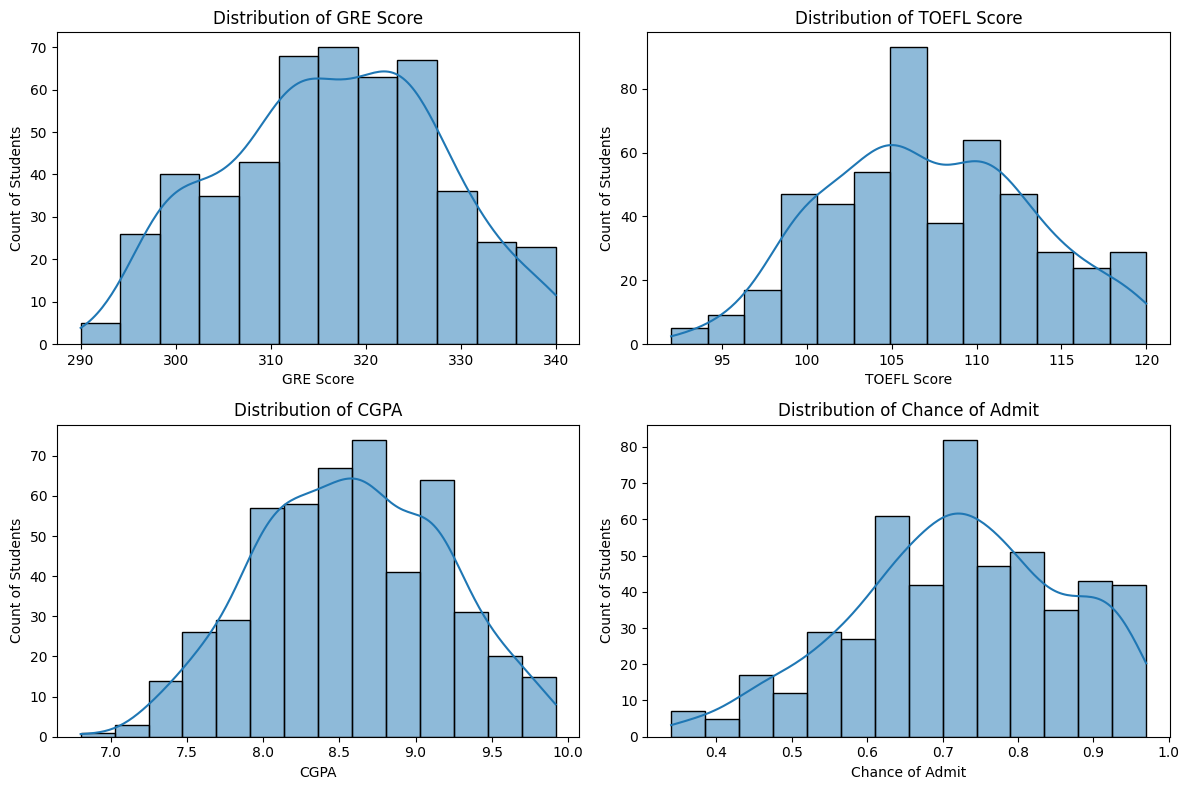

In [ ]:

# Distribution of continuous numerical features
numeric_cols = data_df.select_dtypes(include=['float','int']).columns.tolist()

num_plots = len(numeric_cols)
num_rows = (num_plots + 1) // 2

plt.figure(figsize=(12, num_rows * 4))
i = 1
for col in numeric_cols:
    ax = plt.subplot(num_rows, 2, i)
    sns.histplot(data=data_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count of Students')
    i += 1

plt.tight_layout()
plt.show()

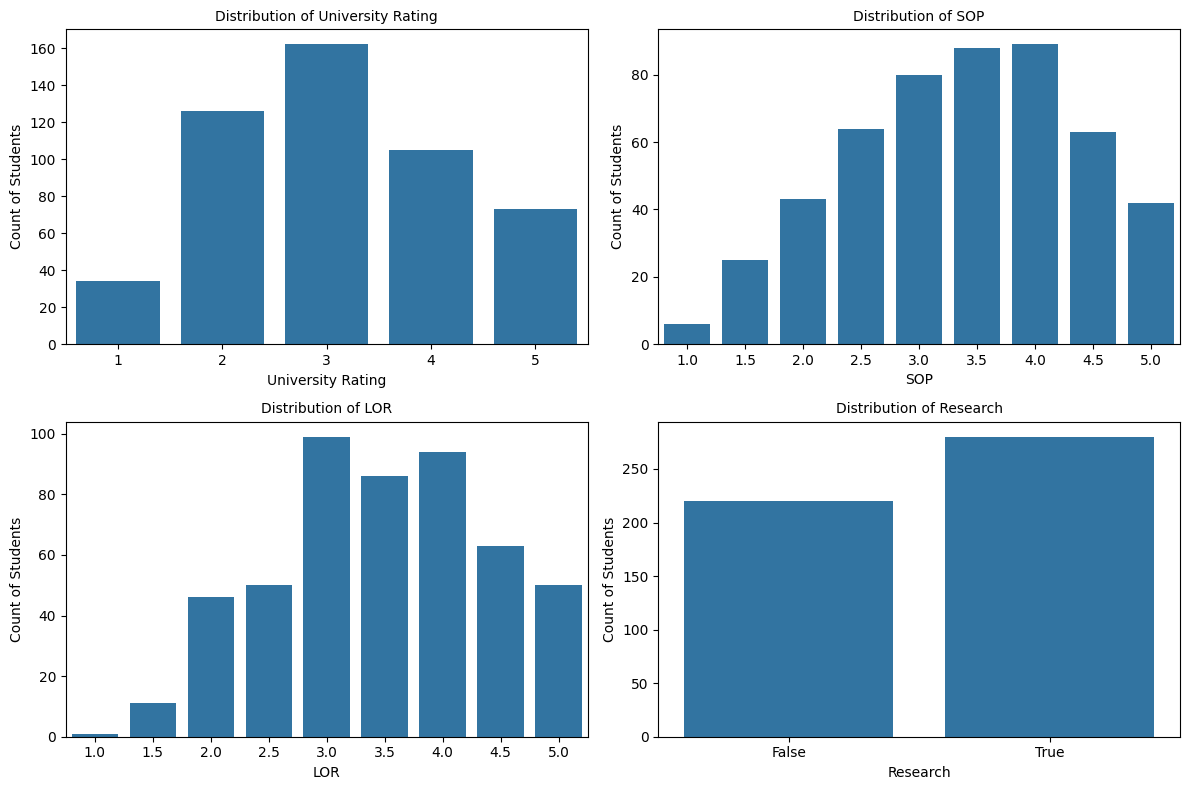

In [ ]:
#Univariate Analysis
# Distribution of data for categorical column
cat_cols = data_df.select_dtypes(include=['bool','category']).columns.tolist()

num_plots = len(cat_cols)
num_rows = (num_plots + 1) // 2
i=1
plt.figure(figsize=(12, num_rows * 4))
for col in cat_cols:
  ax = plt.subplot(num_rows,2,i)
  sns.countplot(x=data_df[col])
  plt.title(f'Distribution of {col}', fontsize=10)
  plt.xlabel(col)
  plt.ylabel('Count of Students')
  i+=1

plt.tight_layout()
plt.show()

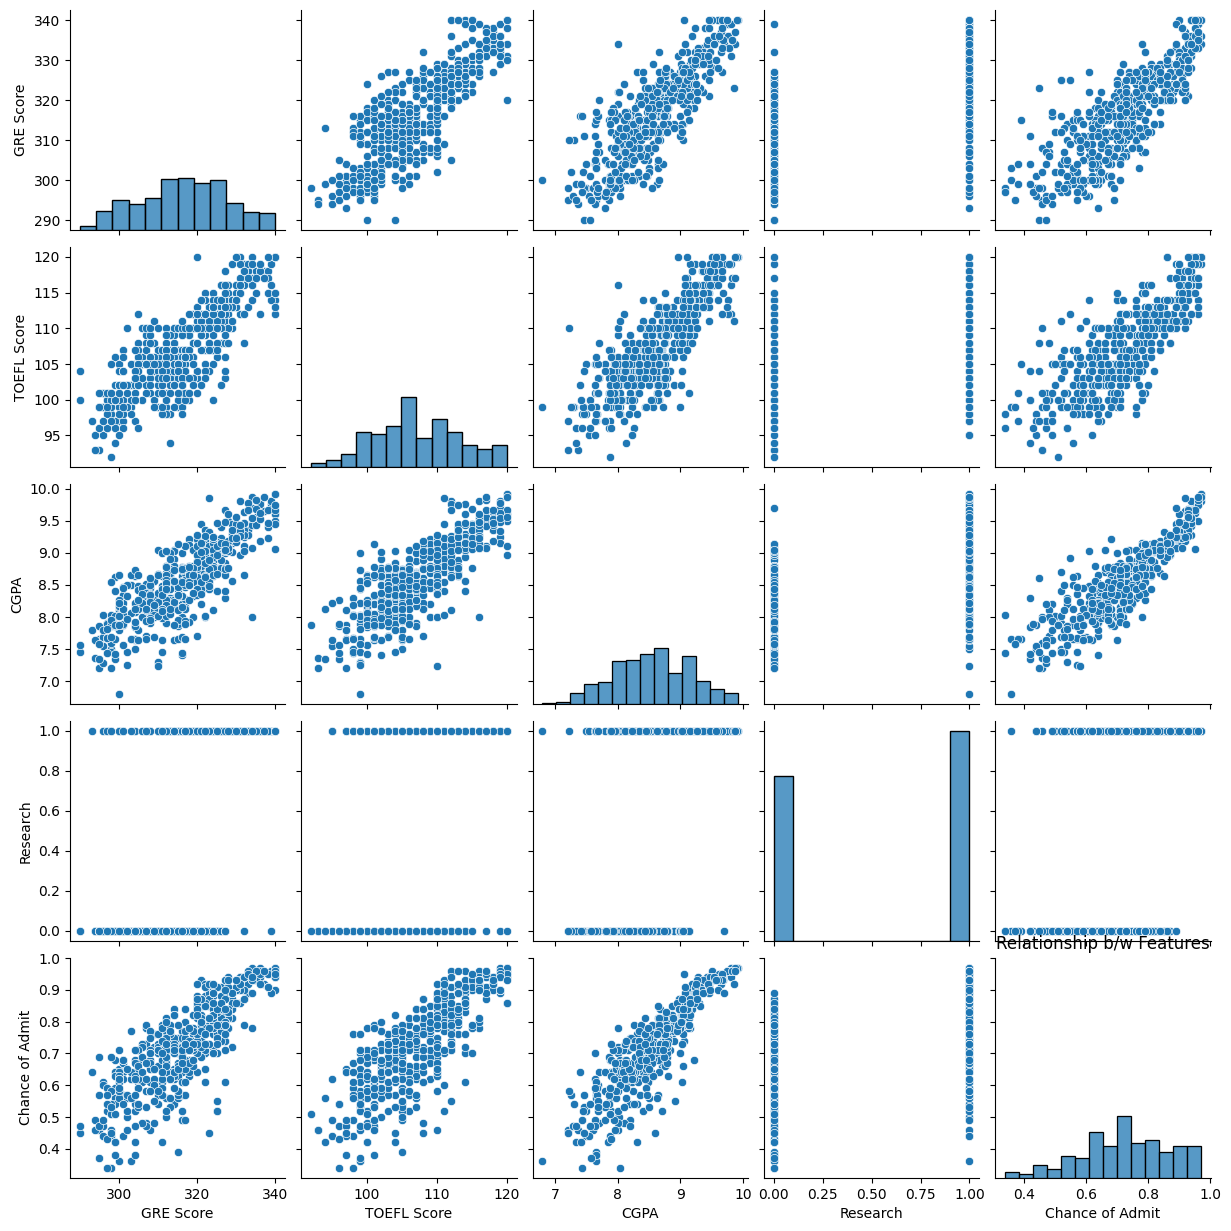

In [ ]:
sns.pairplot(data_df)
plt.title('Relationship b/w Features')
plt.show()

*  Exam scores (GRE, TOEFL and CGPA) have a high positive correlation with chance of admit.
* While university ranking, rating of SOP and LOR also have an impact on chances of admit, research is the only variable which doesn't have much of an impact
* We can see from the scatterplot that the values of university ranking, SOP, LOR and research are not continuous. We can convert these columns to categorical variables

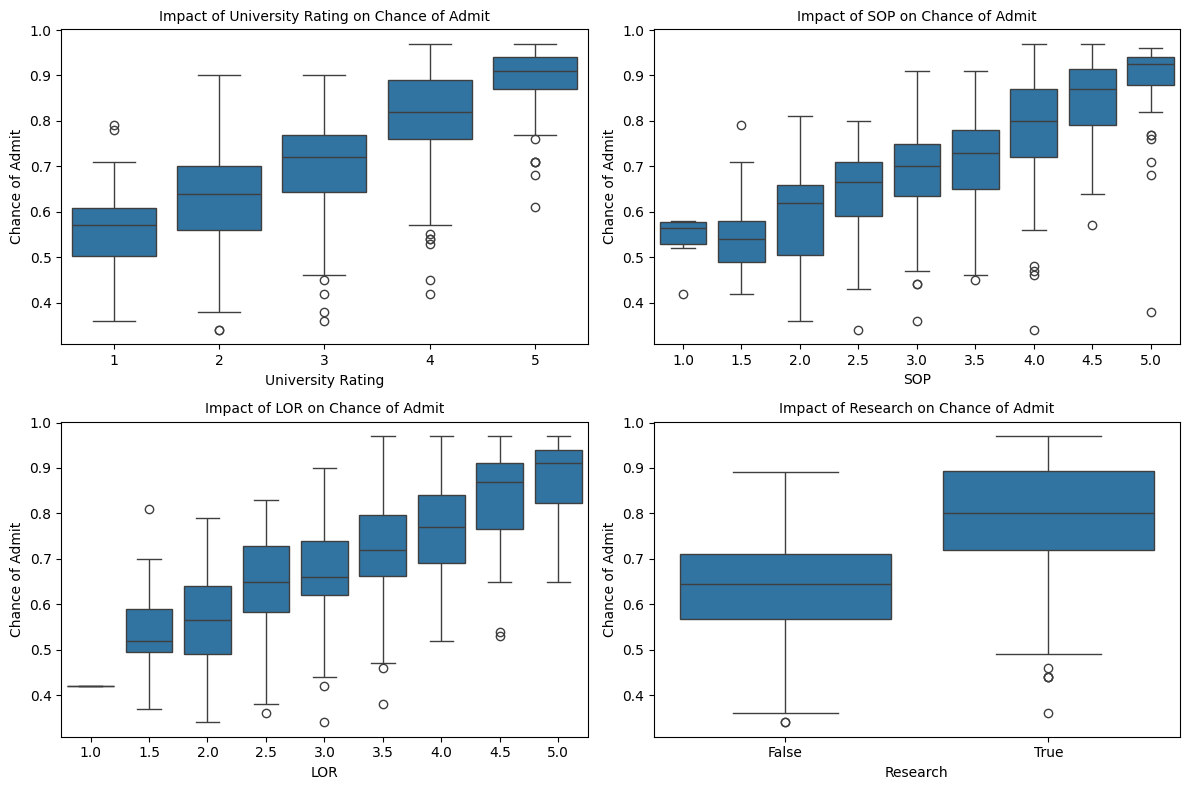

In [ ]:
# Boxplots to analyse the relationship between categorical variables and Chance of Admit

num_plots = len(cat_cols)
num_rows = (num_plots + 1) // 2
i=1
plt.figure(figsize=(12, num_rows * 4))
for col in cat_cols:
  ax = plt.subplot(num_rows,2,i)
  sns.boxplot(data = data_df, x=col, y='Chance of Admit')
  plt.title(f"Impact of {col} on Chance of Admit", fontsize=10)
  plt.xlabel(col)
  plt.ylabel('Chance of Admit')
  i+=1

plt.tight_layout()
plt.show()

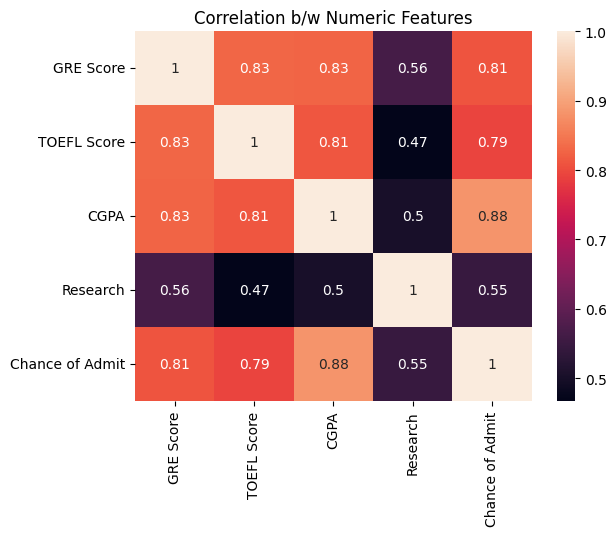

In [ ]:
df_corr = data_df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True)
plt.title('Correlation b/w Numeric Features')
plt.show()

* Confirming the inferences from pairplot, the correlation matrix also shows that exam scores (CGPA/GRE/TOEFL) have a strong positive correlation with chance of admit


# Data Preprocessing
Missing Values/Outliers/Duplicates Check

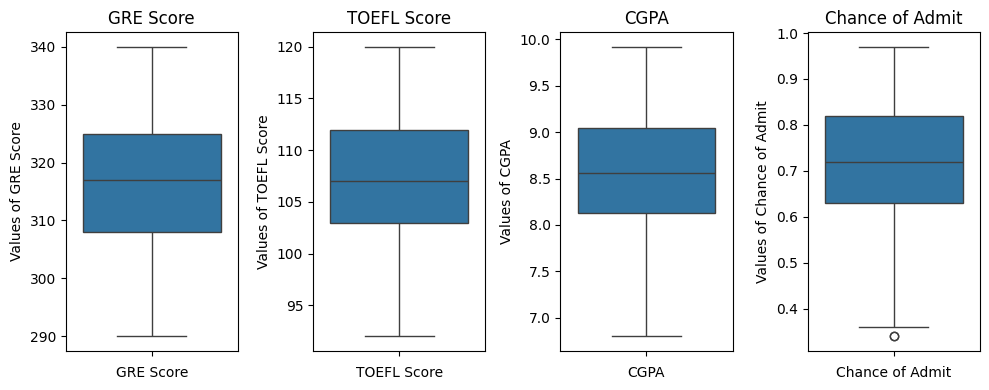

In [ ]:
# Check for outliers in numerical columns
plt.figure(figsize=(10,4))
i=1

for col in numeric_cols:
  ax = plt.subplot(1,4,i)
  sns.boxplot(data_df[col])
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel(f'Values of {col}')
  i+=1

plt.tight_layout()
plt.show()

The pair plot reveals that students with higher CGPA tend to have a higher Chance of Admit, showing a positive correlation between CGPA and admission probability.

# Train-Test Split

In [ ]:
numeric_cols.remove('Chance of Admit')

In [ ]:
# Separate predictor and target variables
x = data_df[numeric_cols + cat_cols]
y = data_df[['Chance of Admit']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (400, 7)
Shape of x_test: (100, 7)
Shape of y_train: (400, 1)
Shape of y_test: (100, 1)


**Data Standardisation**

In [ ]:
# Initialize a dictionary to store the label encoders
label_encoders = {}

# Loop through each categorical column and initialize the label encoder
for col in cat_cols:
    label_encoders[col] = LabelEncoder()

In [ ]:
# Fitting encoders to the respective columns
for col in cat_cols:
  label_encoders[col].fit(x[col])

In [ ]:
#Transforming categorical columns in the train and test data
for col in cat_cols:
  x_train[col] = label_encoders[col].transform(x_train[col])
  x_test[col] = label_encoders[col].transform(x_test[col])

In [ ]:
x_cat_encoded = pd.concat([x_train, x_test])
x_cat_encoded.head(10)

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
249,321,111,8.83,2,5,6,1
433,316,111,8.54,3,6,8,0
19,303,102,8.50,2,5,4,0
322,314,107,8.27,1,3,6,0
332,308,106,8.21,2,5,3,1
56,316,102,7.40,2,2,4,0
301,319,108,8.76,1,3,4,0
229,324,111,9.01,3,4,4,1
331,311,105,8.12,1,4,2,1
132,309,105,8.56,4,5,5,0


In [ ]:
#Initialising object of class MinMaxScaler() for Standardisation
scaler_x = MinMaxScaler()

In [ ]:
#Fitting scaler_x to the training data
scaler_x.fit(x_cat_encoded)

MinMaxScaler()

In [ ]:
all_cols = x_train.columns

In [ ]:
#Transforming numeric columns of x_train and x_test
x_train[all_cols]=scaler_x.transform(x_train[all_cols])
x_test[all_cols]=scaler_x.transform(x_test[all_cols])

In [ ]:
x_test.head()

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
361,0.88,0.857143,0.878205,0.75,0.750,0.625,1.0
73,0.48,0.571429,0.717949,0.75,0.875,0.750,1.0
374,0.50,0.464286,0.272436,0.25,0.250,0.375,0.0
155,0.44,0.607143,0.605769,0.50,0.500,0.500,0.0
104,0.72,0.714286,0.721154,0.50,0.625,0.500,1.0


# Linear Regression Model

In [ ]:
#Initialising object of Class LinearRegression()
model_lr = LinearRegression()

In [ ]:
# Fitting the model to the training data
model_lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predicting values for the training and test data
y_pred_train = model_lr.predict(x_train)
y_pred_test = model_lr.predict(x_test)

In [ ]:
# Evaluating the model using multiple loss functions
def model_evaluation(y_actual, y_forecast, model):
  n = len(y_actual)
  if len(model.coef_.shape)==1:
    p = len(model.coef_)
  else:
    p = len(model.coef_[0])
  MAE = np.round(mean_absolute_error(y_true=y_actual, y_pred=y_forecast),2)
  RMSE = np.round(mean_squared_error(y_true=y_actual,
                                     y_pred=y_forecast, squared=False),2)
  r2 = np.round(r2_score(y_true=y_actual, y_pred=y_forecast),2)
  adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-p-1)),2)
  return print(f"MAE: {MAE}\nRMSE: {RMSE}\nR2 Score: {r2}\nAdjusted R2: {adj_r2}")

In [ ]:
# Metrics for training data
model_evaluation(y_train.values, y_pred_train, model_lr)

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.82


In [ ]:
#Metrics for test data
model_evaluation(y_test.values, y_pred_test, model_lr)

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.81


* Since there is no difference in the loss scores of training and test data, we can conclude that there is no overfitting of the model

* Mean Absolute Error of 0.04 shows that on an average, the absolute difference between the actual and predicted values of chance of admit is 4%
* Root Mean Square Error of 0.06 means that on an average, the root of squared difference between the actual and predicted values is 6%
* R2 Score of 0.82 means that our model captures 82% variance in the data
* Adjusted R2 is an extension of R2 which shows how the number of features used changes the accuracy of the prediction

In [ ]:
# Model Coefficients
for feature,weight in zip(x_train.columns, model_lr.coef_[0]):
  print(f"Weight of {feature}: {np.round(weight,2)}")

Weight of GRE Score: 0.12
Weight of TOEFL Score: 0.08
Weight of CGPA: 0.35
Weight of University Rating: 0.01
Weight of SOP: 0.01
Weight of LOR: 0.07
Weight of Research: 0.02


In [ ]:
# Bias Term of the Model

model_lr.intercept_

array([0.34696506])

In [ ]:
# Define the model evaluation function
def model_evaluation(y_actual, y_forecast, model):
    n = len(y_actual)
    if len(model.coef_.shape) == 1:
        p = len(model.coef_)
    else:
        p = len(model.coef_[0])
    MAE = np.round(mean_absolute_error(y_true=y_actual, y_pred=y_forecast), 2)
    RMSE = np.round(mean_squared_error(y_true=y_actual, y_pred=y_forecast, squared=False), 2)
    r2 = np.round(r2_score(y_true=y_actual, y_pred=y_forecast), 2)
    adj_r2 = np.round(1 - ((1 - r2) * (n - 1) / (n - p - 1)), 2)
    return print(f"MAE: {MAE}\nRMSE: {RMSE}\nR2 Score: {r2}\nAdjusted R2: {adj_r2}")

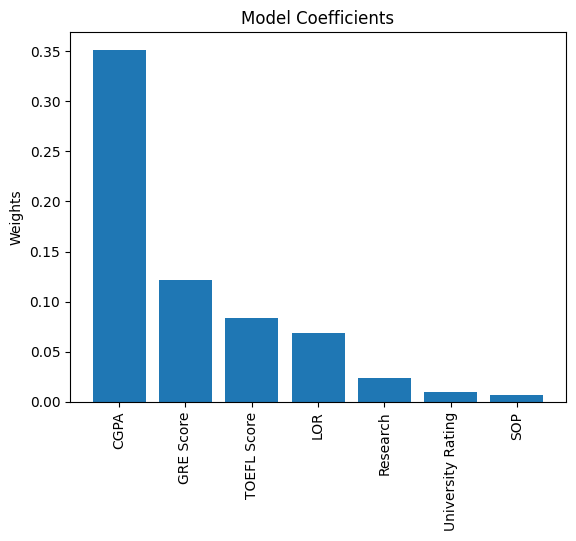

In [ ]:
model_weights=list(zip(x_train.columns, model_lr.coef_[0]))
model_weights.sort(key=lambda x:x[1], reverse=True)

features = [i[0] for i in model_weights ]
weights = [i[1] for i in model_weights ]

plt.bar(x=features, height=weights)
plt.title('Model Coefficients')
plt.ylabel('Weights')
plt.xticks(rotation=90)
plt.show()

# Testing Assumptions of Linear Regression Model
Multicolinearity Check

In [ ]:
vif = pd.DataFrame()
vif['Variable'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif

,Variable,VIF
0,GRE Score,31.185925
1,TOEFL Score,26.753950
2,CGPA,41.732265
3,University Rating,10.837374
4,SOP,18.864173
5,LOR,14.657099
6,Research,3.366187


In [ ]:
residuals = y_test.values - y_pred_test
residuals.reshape((-1,))
print('Mean of Residuals: ', residuals.mean())

Mean of Residuals:  -0.005453623717661285


**Linearity of Variables**

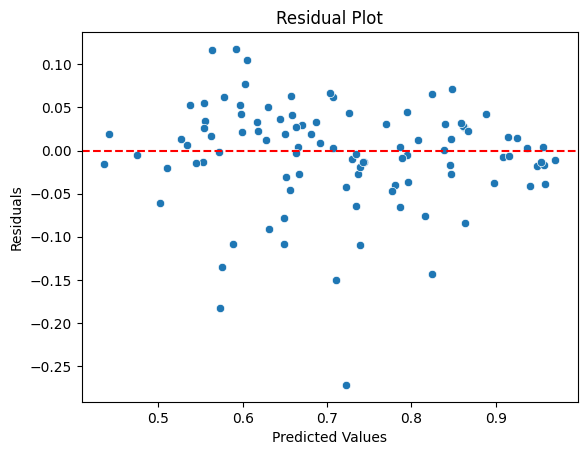

In [ ]:
sns.scatterplot(x = y_pred_test.reshape((-1,)), y=residuals.reshape((-1,)))
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

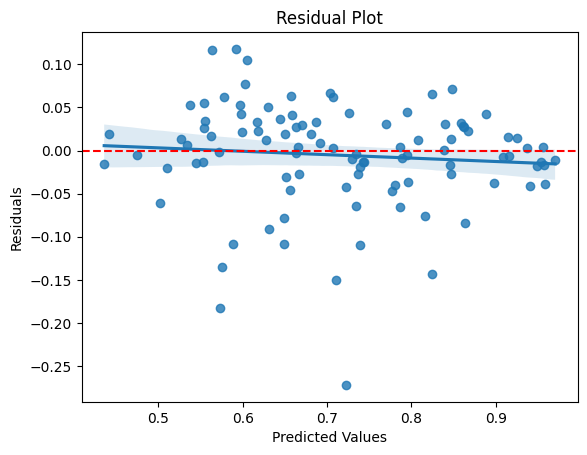

In [ ]:
sns.regplot(x = y_pred_test.reshape((-1,)), y=residuals.reshape((-1,)))
plt.title('Regression Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

**Homoscedasticity**

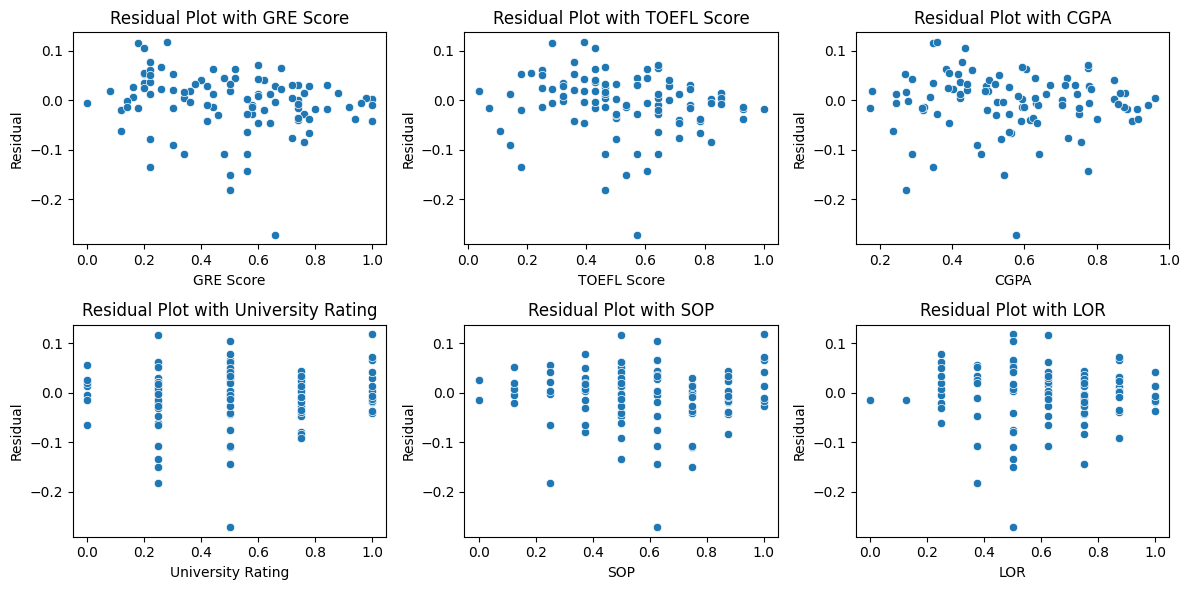

In [ ]:
# Scatterplot of residuals with each independent variable to check for Homoscedasticity
plt.figure(figsize=(12,6))
i=1
for col in x_test.columns[:-1]:
  ax = plt.subplot(2,3,i)
  sns.scatterplot(x=x_test[col].values.reshape((-1,)), y=residuals.reshape((-1,)))
  plt.title(f'Residual Plot with {col}')
  plt.xlabel(col)
  plt.ylabel('Residual')
  i+=1

plt.tight_layout()
plt.show()

**Normality of Residuals**

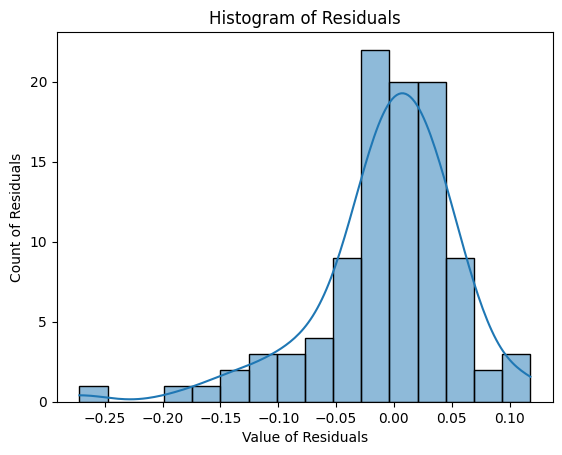

In [ ]:
sns.histplot(residuals.reshape((-1,)), kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Value of Residuals')
plt.ylabel('Count of Residuals')
plt.show()

The histogram shows that there is a negative skew in the distribution of residuals but it is close to a normal distribution


**Model’s performance**

In [ ]:
# Initialising instance of Ridge and Lasso classes
model_ridge = Ridge()
model_lasso = Lasso()

In [ ]:
# Fitting the models to training data
model_ridge.fit(x_train, y_train)
model_lasso.fit(x_train, y_train)

Lasso()

In [ ]:
# Predicting values for train and test data

y_train_ridge = model_ridge.predict(x_train)
y_test_ridge = model_ridge.predict(x_test)

y_train_lasso = model_lasso.predict(x_train)
y_test_lasso = model_lasso.predict(x_test)

In [ ]:
# Evaluating Model Performance
print('Ridge Regression Training Accuracy\n')
model_evaluation(y_train.values, y_train_ridge, model_ridge)
print('\n\nRidge Regression Test Accuracy\n')
model_evaluation(y_test.values, y_test_ridge, model_ridge)
print('\n\nLasso Regression Training Accuracy\n')
model_evaluation(y_train.values, y_train_lasso, model_lasso)
print('\n\nLasso Regression Test Accuracy\n')
model_evaluation(y_test.values, y_test_lasso, model_lasso)

Ridge Regression Training Accuracy

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.82


Ridge Regression Test Accuracy

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.81


Lasso Regression Training Accuracy

MAE: 0.11
RMSE: 0.14
R2 Score: 0.0
Adjusted R2: -0.02


Lasso Regression Test Accuracy

MAE: 0.12
RMSE: 0.14
R2 Score: -0.01
Adjusted R2: -0.09


# Insights & Recommendations
**Insights:**

* The distribution of target variable (chances of admit) is left-skewed
Exam scores (CGPA/GRE/TOEFL) have a strong positive correlation with chance of admit.
* These variables are also highly correlated amongst themselves
the categorical variables such as university ranking, research, quality of SOP and LOR also show an upward trend for chances of admit.
* From the model coefficients (weights), we can conclude that CGPA is the most significant predictor variable while SOP/University Rating are the least significant
* Both Linear Regression and Ridge Regression models, which are our best models, have captured upto 82% of the variance in the target variable (chance of admit). Due to high colinearity among the predictor variables, it is difficult to achieve better results.
* Other than multicolinearity, the predictor variables have met the conditions required for Linear Regression - mean of residuals is close to 0, linearity of variables, normality of residuals and homoscedasticity is established.

**Recommendations:**

* Since all the exam scores are highly correlated, it is recommended to add more independent features for better prediction.
* Examples of other independent variables could be work experience, internships, mock interview performance, extracurricular activities or diversity variables